In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = Path('../../Dados/Dados-Metereologicos/Horarios/' +\
     'dados_82798_H_C_2008-01-01_2013-12-31.csv'
     )

In [6]:
#importando o dataframe a partir do csv dos dados horários
df_horario = pd.read_csv(file_path, header=9, sep=';')

#excluindo a coluna a mais
df_horario.drop('Unnamed: 6', axis=1, inplace=True)

#tornando a hora de medição um número do tipo horas:00
df_horario['Hora Medicao'] = (df_horario['Hora Medicao']//100).astype(str)+':'+'00' 

#concatenando a hora com a data de medição e retirando a coluna das horas
df_horario['Data Medicao'] = df_horario['Data Medicao'] + ' ' + df_horario['Hora Medicao'].astype(str)
df_horario.drop('Hora Medicao', axis=1, inplace=True)

#transformando a coluna Data Medicao para o tipo datetime
df_horario['Data Medicao'] = pd.to_datetime(df_horario['Data Medicao'])

#tornando a coluna em índices.
df_horario.set_index('Data Medicao', inplace=True)

#Por fim, transformando os dados para o tipo float
for coluna in df_horario.columns:
    df_horario[coluna] = df_horario[coluna].str.replace(',','.').astype(float)

df_horario.head()

,"PRECIPITACAO TOTAL, HORARIO(mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)","TEMPERATURA DO AR - BULBO UMIDO, HORARIA(°C)","VENTO, VELOCIDADE HORARIA(m/s)"
Data Medicao,,,,
2008-01-01 00:00:00,0.0,26.8,22.6,3.3
2008-01-01 12:00:00,0.0,29.4,23.3,3.5
2008-01-01 18:00:00,0.0,29.6,23.5,3.3
2008-01-02 00:00:00,0.0,26.6,22.2,2.6
2008-01-02 12:00:00,0.0,29.8,23.9,3.3


In [8]:
#Criando dataframe diário
df_diario = pd.DataFrame(columns = ['PRECIPITAÇÃO MÁXIMA (mm)', 
                                    'TEMPERATURA MÁXIMA-BULBO SECO(°C)',
                                    'TEMPERATURA MÁXIMA-BULBO UMIDO(°C)',
                                    'VELOCIDADE MÁXIMA DO VENTO (m/s)'])
#a precipitação máxima diária
df_diario['PRECIPITAÇÃO MÁXIMA (mm)'] = df_horario['PRECIPITACAO TOTAL, HORARIO(mm)'].resample('D').max()

#a temperatura máxima bulbo seco
df_diario['TEMPERATURA MÁXIMA-BULBO SECO(°C)'] = df_horario['TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)'].resample('D').max()

#a temperatura máxima bulbo úmido
df_diario['TEMPERATURA MÁXIMA-BULBO UMIDO(°C)'] = df_horario['TEMPERATURA DO AR - BULBO UMIDO, HORARIA(°C)'].resample('D').max()

#a velocidade máxima do vento
df_diario['VELOCIDADE MÁXIMA DO VENTO (m/s)'] = df_horario['VENTO, VELOCIDADE HORARIA(m/s)'].resample('D').max()

df_diario.head()

,PRECIPITAÇÃO MÁXIMA (mm),TEMPERATURA MÁXIMA-BULBO SECO(°C),TEMPERATURA MÁXIMA-BULBO UMIDO(°C),VELOCIDADE MÁXIMA DO VENTO (m/s)
Data Medicao,,,,
2008-01-01,0.0,29.6,23.5,3.5
2008-01-02,0.0,29.8,24.1,4.6
2008-01-03,0.0,29.8,24.7,6.0
2008-01-04,0.0,29.6,25.1,4.6
2008-01-05,0.0,30.0,24.3,4.6


## Gráficos

In [11]:
#Propriedade dos Gráficos

#selecionando a aparência do gráfico
plt.style.use('seaborn-dark-palette')

#função que cria os subplots [3x2]
def met_subplots(fig_axes, coluna, label_y, legenda):
    
    ano = 2008
    #laço que percorre cada subplot, sendo i a linha e j a coluna desse.
    for i in range(3):
        for j in range(2):
            
            #selecionando o dado que vai ser plotado (divididos por anos) 
            df = df_diario.loc[df_diario.index.year == ano][coluna]
            
            #realizando o plot do dataframe do ano específico
            fig_axes[i,j].plot(df, label=legenda)

            #definindo o título do subplot
            fig_axes[i,j].set_title(f'Ano de {ano}', size=25)
            ano = ano + 1

            #definindo labels
            fig_axes[i,j].set_xlabel(label_x, size=20)
            fig_axes[i,j].set_ylabel(label_y, size=20)

            #ajustando os ticks
            fig_axes[i,j].tick_params(axis='x', labelsize=16, rotation=40)
            fig_axes[i,j].tick_params(axis='y', labelsize=16)

            #f1_axes[i,j].xaxis.set_major_locator(ticker.LinearLocator(52))
            #f1_axes[i,j].xaxis.set_major_formatter(fmt)
            #f1_axes[i,j].xaxis.set_minor_locator(days)

            #adicionando a grade e a legenda ao subplot
            fig_axes[i,j].grid(True)
            if legenda != '':
                fig_axes[i,j].legend()

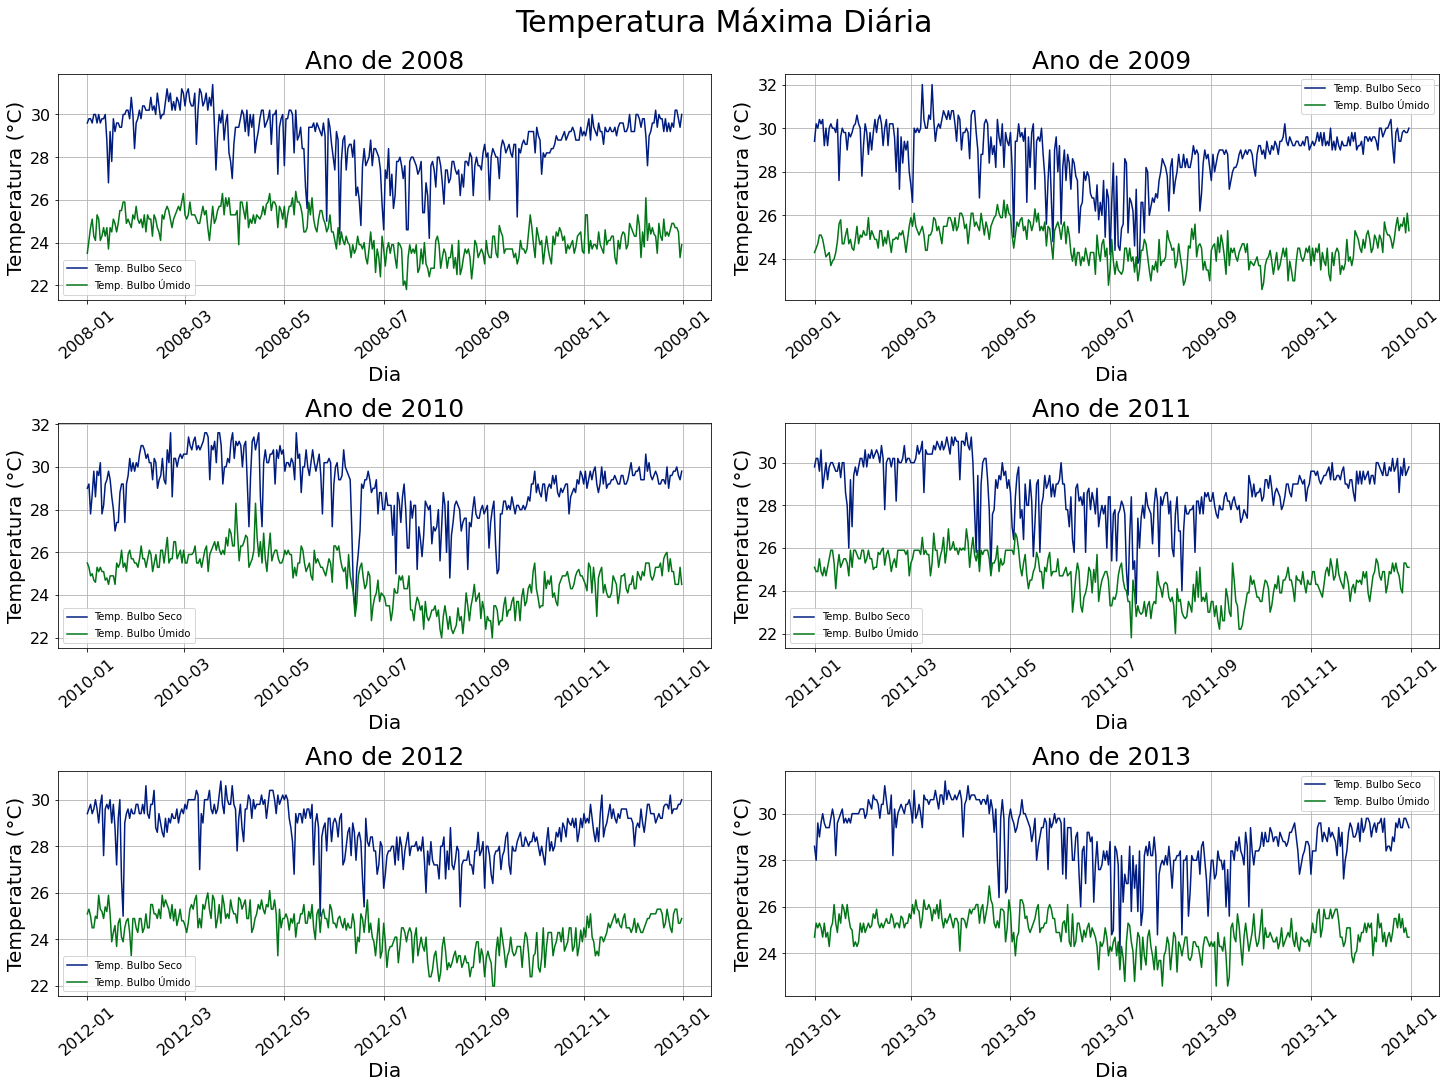

In [12]:
#Temperatura

#criando os objetos para realizar o subplot
fig1, f1_axes  = plt.subplots(ncols=2, nrows=3, constrained_layout=True, figsize=(20,15))

#Definindo o título superior
fig1.suptitle('Temperatura Máxima Diária', size=30)

#Definindo os labels y
label_y_T = 'Temperatura (°C)'

coluna_temp_bulboseco = 'TEMPERATURA MÁXIMA-BULBO SECO(°C)'
coluna_temp_bulboumido = 'TEMPERATURA MÁXIMA-BULBO UMIDO(°C)'

#usando a função para realizar o gráfico
met_subplots(fig_axes = f1_axes, coluna = coluna_temp_bulboseco, label_y = label_y_T, legenda = 'Temp. Bulbo Seco')
met_subplots(fig_axes = f1_axes, coluna = coluna_temp_bulboumido, label_y = label_y_T, legenda = 'Temp. Bulbo Úmido')

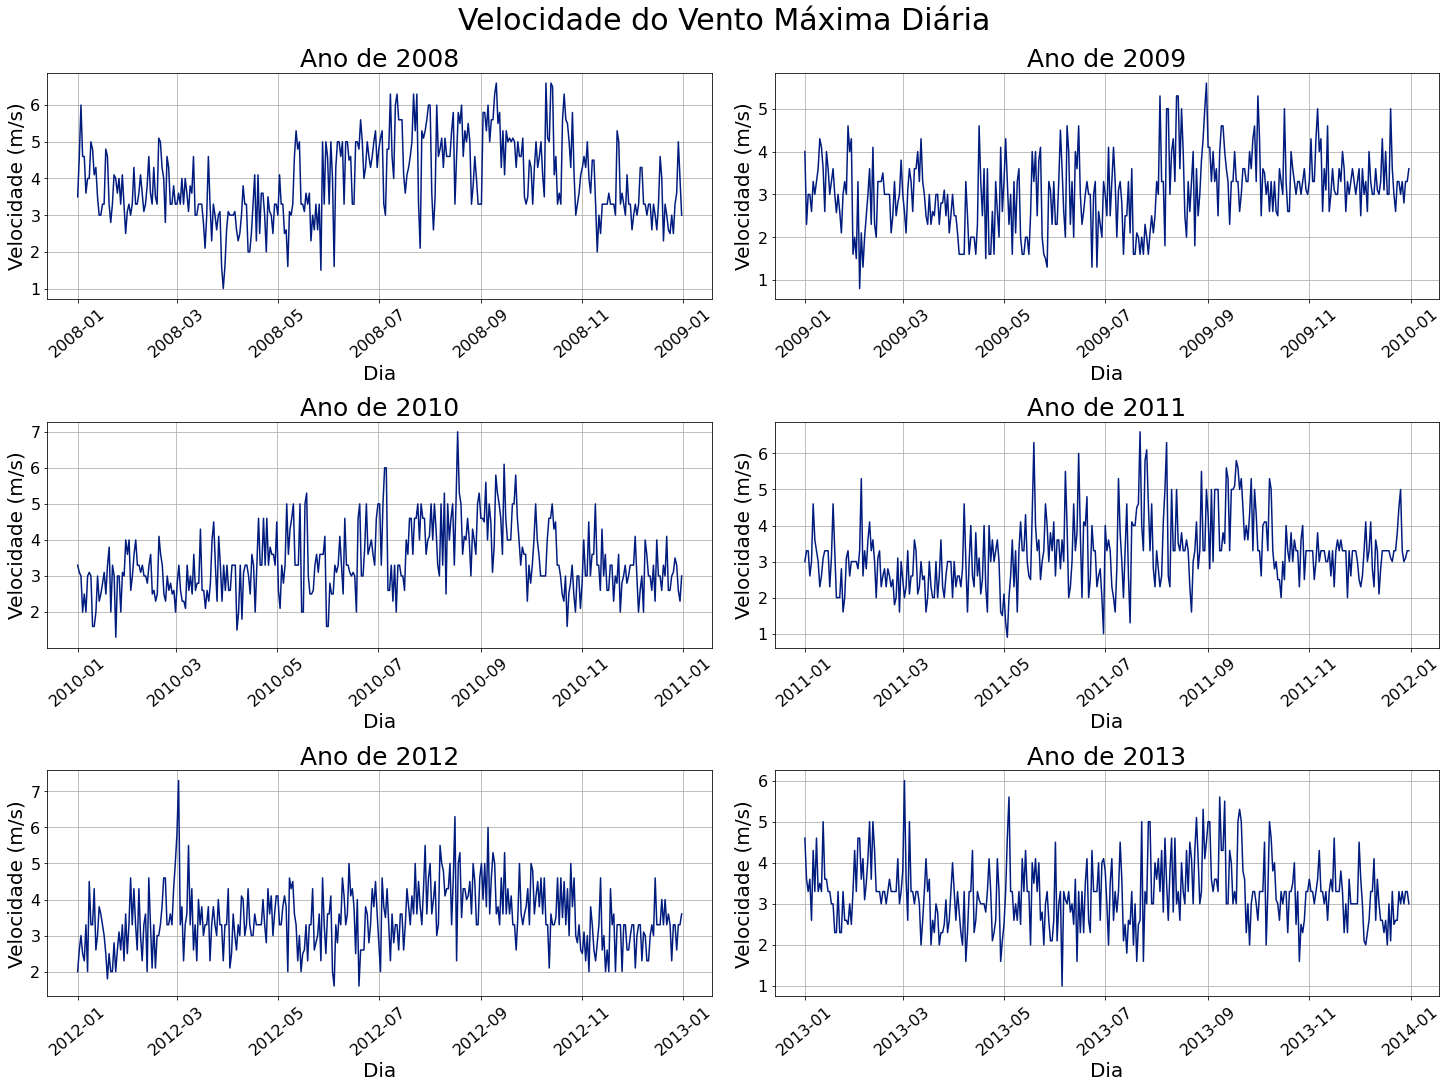

In [13]:
#Vento

#criando os objetos para realizar o subplot
fig2, f2_axes  = plt.subplots(ncols=2, nrows=3, constrained_layout=True, figsize=(20,15))

#Definindo o título superior
fig2.suptitle('Velocidade do Vento Máxima Diária', size=30)

#Definindo os labels x e y
label_y_V = 'Velocidade (m/s)'
coluna_vento_max = 'VELOCIDADE MÁXIMA DO VENTO (m/s)'

#usando a função para realizar o gráfico
met_subplots(fig_axes = f2_axes, coluna = coluna_vento_max , label_y = label_y_V, legenda = '')

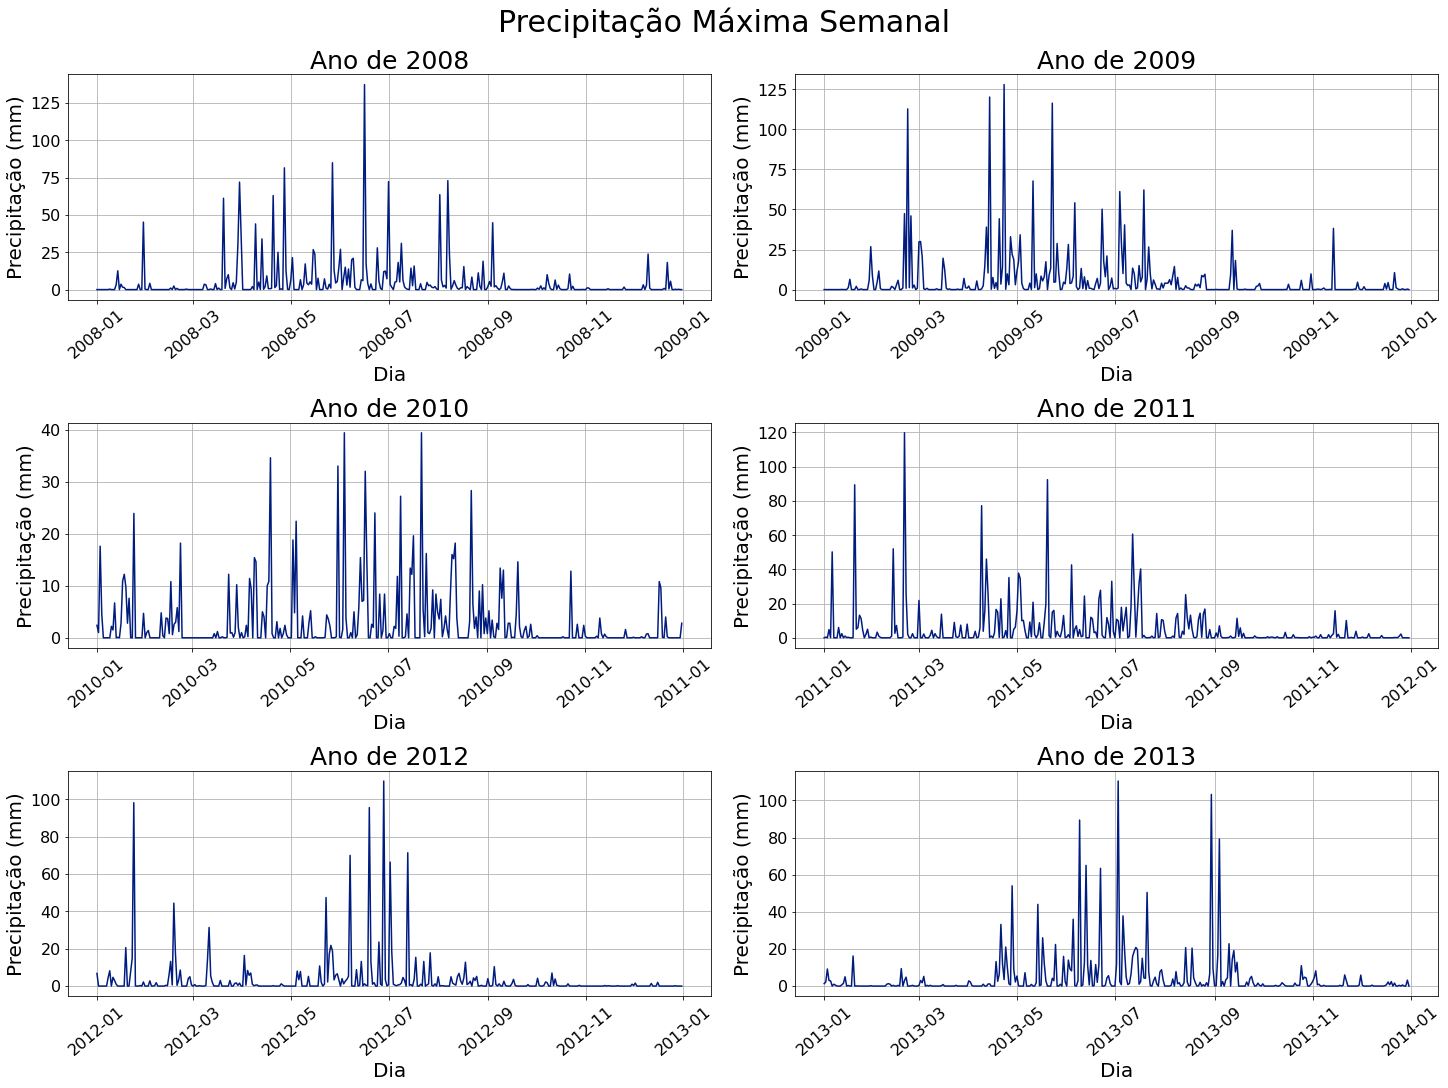

In [14]:
#Chuva

#criando os objetos para realizar o subplot
fig3, f3_axes  = plt.subplots(ncols=2, nrows=3, constrained_layout=True, figsize=(20,15))

#Definindo o título superior
fig3.suptitle('Precipitação Máxima Semanal', size=30)

#Definindo os label y
label_y_C = 'Precipitação (mm)'
coluna_chuva_max = 'PRECIPITAÇÃO MÁXIMA (mm)'

#usando a função para realizar o gráfico
met_subplots(fig_axes = f3_axes, coluna = coluna_chuva_max , label_y = label_y_C, legenda = '')